# Perspective Transform

I have adjusted the coordinates `(src, dst)` so that the line looks straight

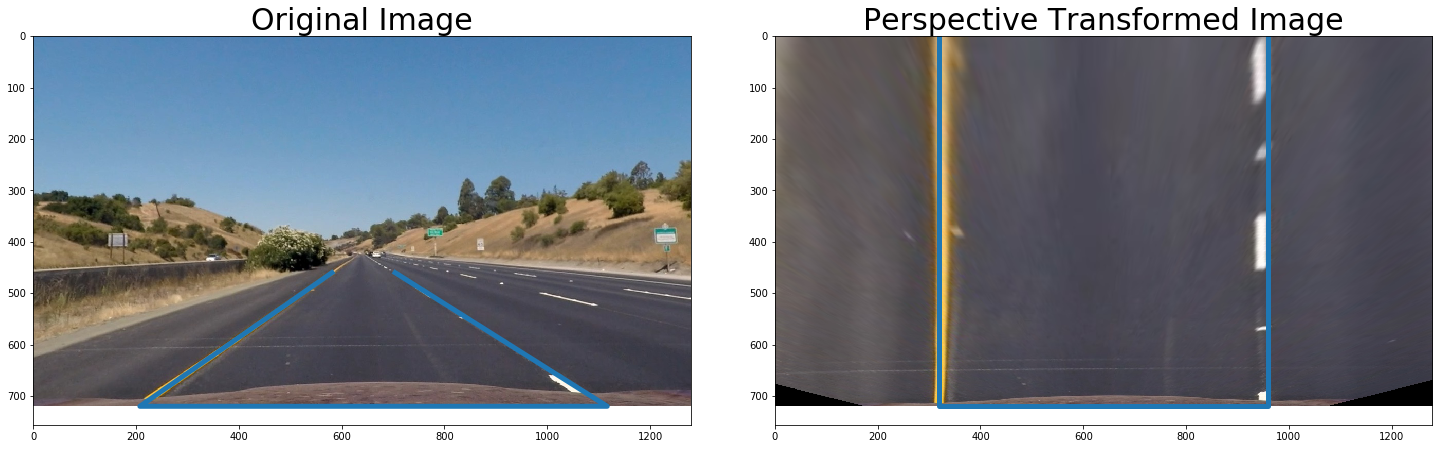

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('output_images/straight_lines1_undist.jpg')
img_size=(img.shape[1], img.shape[0])    
src = np.float32(
    [[(img_size[0] / 2) - 59, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 6), img_size[1]],
    [(img_size[0] * 5 / 6) + 50, img_size[1]],
    [(img_size[0] / 2 + 64), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

def warp(img):
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, M, Minv

warped, _, _ = warp(img)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()

ax1.imshow(img)
ax1.plot(src[:, 0], src[:, 1], lw=5)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(warped)
ax2.plot(dst[:, 0], dst[:, 1], lw=5)
ax2.set_title('Perspective Transformed Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

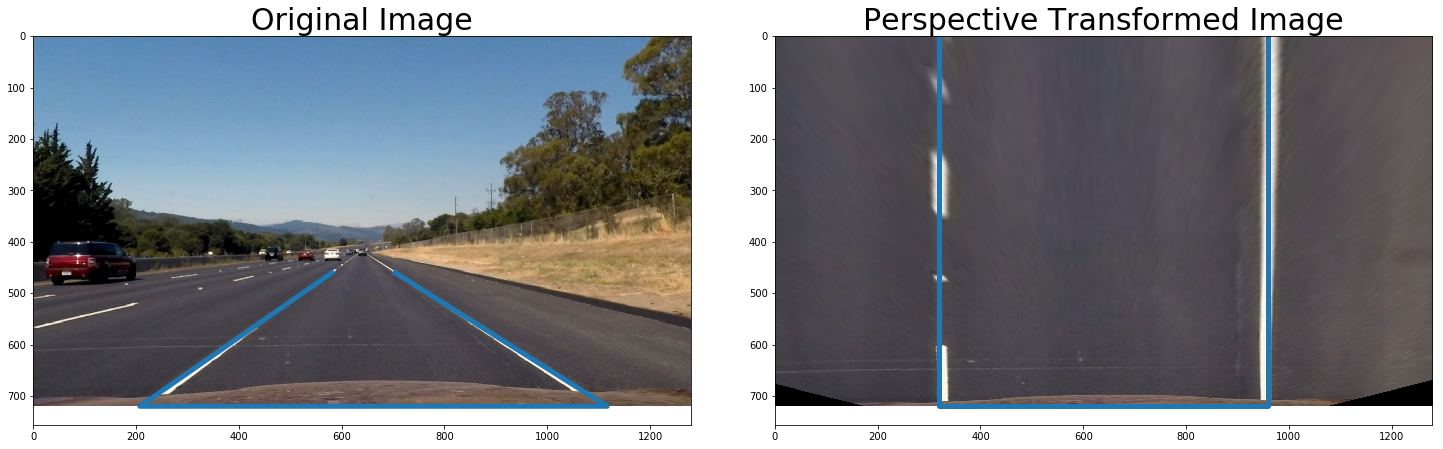

In [2]:
img = mpimg.imread('output_images/straight_lines2_undist.jpg')

warped, _, _ = warp(img)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()

ax1.imshow(img)
ax1.plot(src[:, 0], src[:, 1], lw=5)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(warped)
ax2.plot(dst[:, 0], dst[:, 1], lw=5)
ax2.set_title('Perspective Transformed Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

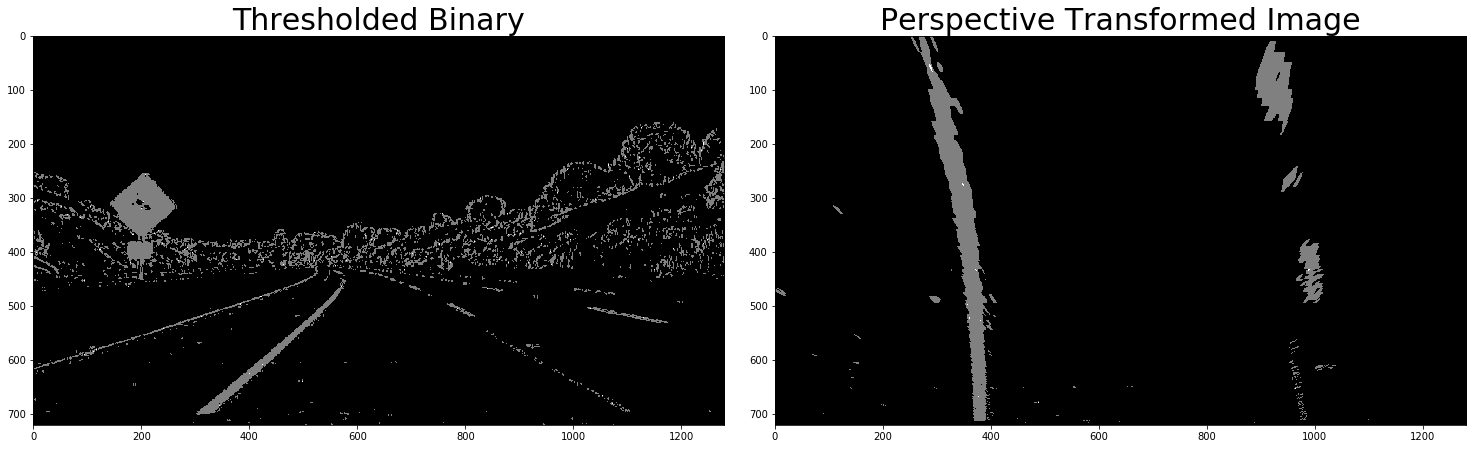

In [3]:
img = mpimg.imread('output_images/test2_threshold.jpg')
warped, _, _ = warp(img)
cv2.imwrite('output_images/test2_perspective_transformed.jpg', warped)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
f.tight_layout()

ax1.imshow(img, cmap='gray')
#ax1.plot(src[:, 0], src[:, 1], lw=5)
ax1.set_title('Thresholded Binary', fontsize=30)

ax2.imshow(warped, cmap='gray')
#ax2.plot(dst[:, 0], dst[:, 1], lw=5)
ax2.set_title('Perspective Transformed Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('output_images/test2_perspective_transformed_for_submission.jpg');